<a href="https://colab.research.google.com/github/Kallukalluzzz/Mini-Project/blob/main/Copy_of_CNN_mINI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#importing the required libraries
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [20]:
data=pd.read_csv("/content/DGA dataset_new.csv")
data

,NM,H2,CH4,C2H6,C2H4,C2H2,Type
0,1,3930.0,2397.0,157.0,0.0,0.0,Partial discharge
1,2,37800.0,1740.0,249.0,8.0,8.0,Partial discharge
2,3,92600.0,10200.0,0.0,0.0,0.0,Partial discharge
3,4,8266.0,1061.0,22.0,0.0,0.0,Partial discharge
4,5,9340.0,995.0,60.0,6.0,7.0,Partial discharge
...,...,...,...,...,...,...,...
266,267,2443.0,3422.0,7852.0,3000.0,6394.0,No fault
267,268,4395.0,5201.0,6933.0,6788.0,2121.0,No fault
268,269,7613.0,1120.0,3363.0,4751.0,3393.0,No fault
269,270,2366.0,1031.0,5909.0,108.0,7025.0,No fault


In [75]:
data['Type'].unique()

array(['Partial discharge', 'Spark discharge', 'Arc discharge',
       'High-temperature overheating', 'Middle-temperature overheating',
       'Low-temperature overheating',
       'Low/Middle-temperature overheating', 'High intensity discharge',
       'Low intensity discharge', 'Thermal fault', 'No fault'],
      dtype=object)

In [21]:
X=data.drop(['Type', 'NM'],axis=1)
Y=data['Type']

In [22]:
Y = pd.factorize(Y)
Y = Y[0]

In [23]:
Xtrain.shape

(135, 5, 1)

In [24]:
Ytrain.shape

(135,)

In [25]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,train_size=0.5)

In [26]:
import numpy as np
Xtrain = np.expand_dims(Xtrain, axis=2)
Xtest = np.expand_dims(Xtest, axis=2)

In [27]:
Xtrain.shape

(135, 5, 1)

In [73]:
Xtrain

array([[[1.11000e+02],
        [5.59000e+02],
        [2.43000e+02],
        [7.07000e+02],
        [0.00000e+00]],

       [[8.60000e+02],
        [1.67000e+03],
        [3.00000e+01],
        [2.05000e+03],
        [4.00000e+01]],

       [[0.00000e+00],
        [2.00000e-01],
        [1.00000e-01],
        [1.30000e-01],
        [0.00000e+00]],

       [[2.10000e+02],
        [4.30000e+01],
        [1.20000e+01],
        [1.02000e+02],
        [1.87000e+02]],

       [[1.20450e+02],
        [2.10910e+02],
        [3.57000e+01],
        [2.85390e+02],
        [1.58600e+01]],

       [[6.45400e+03],
        [2.31300e+03],
        [1.21000e+02],
        [2.15900e+03],
        [6.43200e+03]],

       [[5.30000e+02],
        [3.45000e+02],
        [8.50000e+01],
        [2.66000e+02],
        [2.50000e+02]],

       [[5.70000e+01],
        [2.40000e+01],
        [2.00000e+00],
        [2.70000e+01],
        [3.00000e+01]],

       [[3.00000e+02],
        [5.00000e+01],
        [3.89000e+

In [66]:
Xtest

array([[[2.47000e+04],
        [6.10000e+04],
        [2.63000e+04],
        [4.21000e+04],
        [1.56000e+03]],

       [[1.10000e+01],
        [1.20000e+01],
        [3.10000e+01],
        [7.80000e+01],
        [2.20000e+01]],

       [[2.24000e+04],
        [2.24000e+04],
        [2.69000e+03],
        [1.34400e+04],
        [1.57000e+03]],

       [[0.00000e+00],
        [1.00000e+02],
        [0.00000e+00],
        [9.00000e+01],
        [3.22000e+00]],

       [[1.03000e+02],
        [2.21700e+02],
        [4.72000e+01],
        [4.22000e+02],
        [9.00000e-01]],

       [[3.00000e+02],
        [7.00000e+02],
        [2.80000e+02],
        [1.70000e+03],
        [3.60000e+01]],

       [[2.60000e+02],
        [2.15000e+02],
        [3.50000e+01],
        [3.34000e+02],
        [2.77000e+02]],

       [[8.80000e+03],
        [6.40640e+04],
        [7.21280e+04],
        [9.56500e+04],
        [0.00000e+00]],

       [[2.36900e+00],
        [1.19690e+02],
        [2.18910e+

In [28]:
np.unique(Ytrain)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [29]:
Ytrain.shape

(135,)

In [55]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv1D(4, 1,activation='elu',input_shape=(5,1)))
#adding pooling layer
# model.add(MaxPool1D())
#adding fully connected layer
model.add(Flatten())
model.add(Dense(16,activation='elu'))
#adding output layer
model.add(Dense(11,activation='softmax'))
#compiling the model
opt = Adam(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )
#fitting the model
history=model.fit(Xtrain,Ytrain,validation_split=0.2,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 239ms/step - loss: 26072.4238 - accuracy: 0.0741 - val_loss: 4379.0845 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 11232.7295 - accuracy: 0.0741 - val_loss: 307.1188 - val_accuracy: 0.1111
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 2060.5117 - accuracy: 0.1759 - val_loss: 259.6069 - val_accuracy: 0.1852
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 845.0745 - accuracy: 0.2130 - val_loss: 276.5373 - val_accuracy: 0.1852
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 715.6821 - accuracy: 0.2593 - val_loss: 275.7385 - val_accuracy: 0.1481
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 747.4161 - accuracy: 0.2222 - val_loss: 244.3610 - val_accuracy: 0.2222
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 701.7963 - accuracy: 0.2685 - val_loss: 204.4928 - val_accuracy: 

In [48]:
model.metrics_names

['loss', 'accuracy']

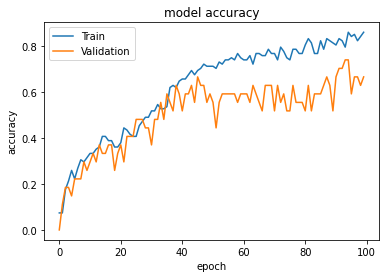

In [56]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

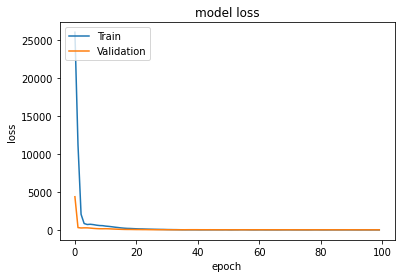

In [57]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [67]:
y_pred=model.predict(Xtest)
y_pred

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.58110212e-17, 2.43049249e-06, 4.77048988e-03, ...,
        1.05718806e-04, 1.57143543e-09, 8.46387469e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.78581594e-10, 3.48790795e-01, 6.50359213e-01, ...,
        9.67180199e-07, 2.96302092e-18, 9.44735348e-08]], dtype=float32)

In [69]:
val_pred = np.argmax(model.predict(Xtest), axis=-1)
val_pred

array([ 6,  3,  6,  4,  3,  3,  2, 10,  5,  6,  1,  1,  1,  2, 10, 10,  4,
       10,  3,  8,  1,  1,  4,  2,  3,  3, 10,  2,  1,  2,  5,  4,  1,  6,
        0,  0,  3,  0,  7,  1,  5,  0,  1,  2, 10,  1,  6,  2,  3,  1,  1,
       10,  8,  4,  3,  1,  1, 10,  2, 10,  3,  5,  0,  9,  2,  2,  1, 10,
        2,  2,  6,  1,  6,  7,  1,  6,  3,  1,  2,  4, 10,  5, 10,  1,  2,
        1,  2,  2,  2,  3,  2,  7,  2,  5,  2,  5,  2, 10,  9,  5,  0,  2,
       10,  5,  2,  4,  1,  3,  1,  5,  9,  8,  2,  1,  0,  2,  0,  3,  2,
        9,  0,  2,  6,  1,  9,  2,  0,  7,  9,  2,  2,  1,  9, 10,  9,  2])

In [70]:
y_pred.shape

(136, 11)

In [76]:
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(classification_report(Ytest, val_pred,target_names=('Partial Discharge', 'Spark discharge', 'Arc discharge',
       'High-temperature overheating', 'Middle-temperature overheating',
       'Low-temperature overheating',
       'Low/Middle-temperature overheating', 'High intensity discharge',
       'Low intensity discharge', 'Thermal fault', 'No fault')))


                                    precision    recall  f1-score   support

                 Partial Discharge       0.20      0.40      0.27         5
                   Spark discharge       0.64      0.67      0.65        24
                     Arc discharge       0.71      0.71      0.71        31
      High-temperature overheating       0.64      0.56      0.60        16
    Middle-temperature overheating       0.14      0.33      0.20         3
       Low-temperature overheating       0.60      0.55      0.57        11
Low/Middle-temperature overheating       0.56      0.56      0.56         9
          High intensity discharge       0.75      1.00      0.86         3
           Low intensity discharge       0.00      0.00      0.00         6
                     Thermal fault       1.00      1.00      1.00         8
                          No fault       0.73      0.55      0.63        20

                          accuracy                           0.61       136
          

<function print>

In [93]:
print(confusion_matrix(Ytest,val_pred))

[[ 2  1  0  0  0  0  0  0  2  0  0]
 [ 0 16  5  0  2  1  0  0  0  0  0]
 [ 0  8 22  0  0  1  0  0  0  0  0]
 [ 0  0  1  9  0  0  2  0  0  0  4]
 [ 0  0  0  2  1  0  0  0  0  0  0]
 [ 1  0  0  0  2  6  2  0  0  0  0]
 [ 1  0  0  0  1  2  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  3  3  1  0  0  1  1  0 11]]


In [94]:
conf=confusion_matrix(Ytest,val_pred)

In [95]:
conf

array([[ 2,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0, 16,  5,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  8, 22,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  9,  0,  0,  2,  0,  0,  0,  4],
       [ 0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  2,  6,  2,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  2,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  3,  3,  1,  0,  0,  1,  1,  0, 11]])

In [97]:
box_labels=[]
for i in range(0,11):
  for j in range(0,11):
    box_labels.append(conf[i][j])



In [99]:
data

,NM,H2,CH4,C2H6,C2H4,C2H2,Type
0,1,3930.0,2397.0,157.0,0.0,0.0,Partial discharge
1,2,37800.0,1740.0,249.0,8.0,8.0,Partial discharge
2,3,92600.0,10200.0,0.0,0.0,0.0,Partial discharge
3,4,8266.0,1061.0,22.0,0.0,0.0,Partial discharge
4,5,9340.0,995.0,60.0,6.0,7.0,Partial discharge
...,...,...,...,...,...,...,...
266,267,2443.0,3422.0,7852.0,3000.0,6394.0,No fault
267,268,4395.0,5201.0,6933.0,6788.0,2121.0,No fault
268,269,7613.0,1120.0,3363.0,4751.0,3393.0,No fault
269,270,2366.0,1031.0,5909.0,108.0,7025.0,No fault


In [101]:
cm

array([[ 2,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0, 16,  5,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  8, 22,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  9,  0,  0,  2,  0,  0,  0,  4],
       [ 0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  2,  6,  2,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  2,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  3,  3,  1,  0,  0,  1,  1,  0, 11]])

In [103]:
box_labels=np.asarray(box_labels).reshape(11,11)

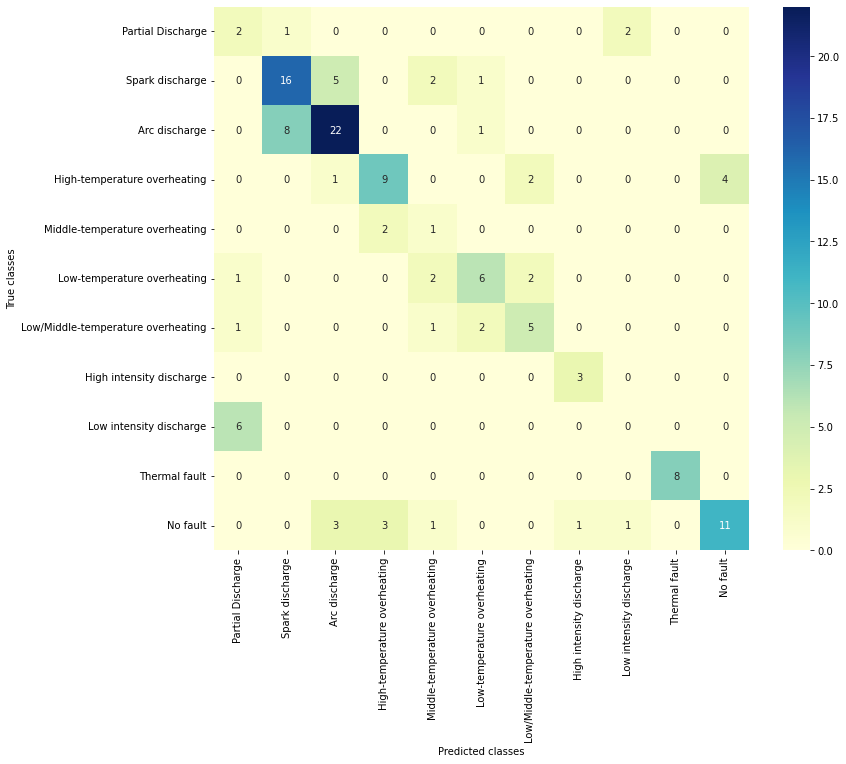

In [106]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
target_names=('Partial Discharge', 'Spark discharge', 'Arc discharge',
       'High-temperature overheating', 'Middle-temperature overheating',
       'Low-temperature overheating',
       'Low/Middle-temperature overheating', 'High intensity discharge',
       'Low intensity discharge', 'Thermal fault', 'No fault')
cm=confusion_matrix(Ytest,val_pred)
plt.figure(figsize=(12,10))

sns.heatmap(cm,xticklabels=target_names,yticklabels=target_names,cmap="YlGnBu",fmt="",annot=box_labels)
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()